# TASK 1:
## First we will read the data


In [1]:
import pandas as pd
import datetime
import numpy as np

from time import gmtime
from time import strftime

dataFrame = pd.read_csv('Q3-data.csv') 
print(dataFrame.head())
# print(dataFrame)

   House  Time      TV      Agg
0    1.0   0.0  11.463   26.205
1    1.0   1.0  11.702   25.771
2    1.0   2.0  11.016   24.963
3    1.0   3.0  11.054   96.582
4    1.0   4.0  11.123  100.034


## The first goal is to clean the data 

Now we are working with time (I am sure that there will be cleaner ways to do this but for now I was searching for the fastest way to move the data from second time to Days-hours-minute-second time

In [2]:
import numpy as np
import matplotlib.pyplot as plt



maxTV = np.zeros((3,1))
minTV = np.zeros((3,1))

allBackets = []
todayBackets = []
housePr = -1
for i in range(len(dataFrame.TV)):
    
    houseNow = int(dataFrame.House[i])-1
    if (housePr!=houseNow):
        if (housePr!=-1):
            allBackets.append(todayBackets)
        todayBackets = []
        todayBackets.append([dataFrame.TV[i],dataFrame.Agg[i],0])
        housePr = houseNow
    else:
        todayBackets.append([dataFrame.TV[i],dataFrame.Agg[i],0])
        
        
allBackets.append(todayBackets)

print(allBackets[0][10][0])
print(allBackets[0][10][1])
print(allBackets[0][10][2])

print("----------------------------")

print(len(allBackets))
print(len(allBackets[0]))
print(len(allBackets[1]))
print(len(allBackets[2]))

print(allBackets[0][20])
print(allBackets[1][20])
print(allBackets[2][20])


MaxMinHouse = np.zeros((2,len(allBackets)))-1 # 0 -> max # 1 -> min
MaxMinHouse[1,:] = 3000

for houseN in range(len(allBackets)):
    for i in range(len(allBackets[houseN])):
        if MaxMinHouse[0,houseN]<allBackets[houseN][i][0]:
            MaxMinHouse[0,houseN] = allBackets[houseN][i][0]
        if MaxMinHouse[1,houseN]>allBackets[houseN][i][0]:
            MaxMinHouse[1,houseN] = allBackets[houseN][i][0]
            
            
print("max,min = ",MaxMinHouse[0,0],MaxMinHouse[1,0])
print("max,min = ",MaxMinHouse[0,1],MaxMinHouse[1,1])
print("max,min = ",MaxMinHouse[0,2],MaxMinHouse[1,2])
        



11.136
98.846
0
----------------------------
3
1440
1440
1440
[11.115, 177.798, 0]
[1.275, 3.005, 0]
[1.2429999999999999, 30.619, 0]
('max,min = ', 23.303, 10.533)
('max,min = ', 136.806, 0.5660000000000001)
('max,min = ', 118.39200000000001, 0.125)


## Function for Histogram
In the next step we will create the histogram and we will seprate the histogram into two parts in order to indicate the information as on and off

So the functino bellow bascially find the optical point to seprate each Histogram

In [3]:
def balanced_hist_thresholding(b):
    # Starting point of histogram
    i_s = np.min(np.where(b>0))
    # End point of histogram
    i_e = np.max(np.where(b>0))
    # Center of histogram
    i_m = (i_s + i_e)//2
    # Left side weight
    w_l = np.sum(b[0:i_m+1])
    # Right side weight
    
    w_r = np.sum(b[i_m+1:i_e+1])
    # Until starting point not equal to endpoint
    while (i_s != i_e):
        # If right side is heavier
        if (w_r > w_l):
            # Remove the end weight
            w_r -= b[i_e]
            i_e -= 1
            # Adjust the center position and recompute the weights
            if ((i_s+i_e)//2) < i_m:
                w_l -= b[i_m]
                w_r += b[i_m]
                i_m -= 1
        else:
            # If left side is heavier, remove the starting weight
            w_l -= b[i_s]
            i_s += 1
            # Adjust the center position and recompute the weights
            if ((i_s+i_e)//2) >= i_m:
                w_l += b[i_m+1]
                w_r -= b[i_m+1]
                i_m += 1
    return i_m

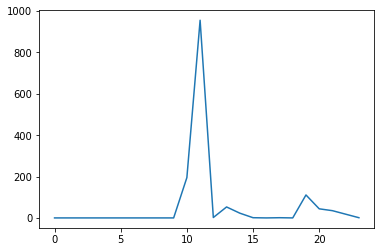

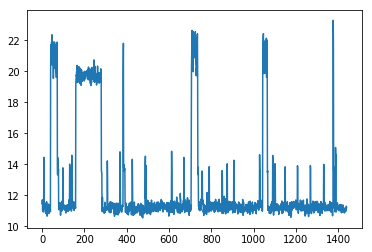

('threshold = ', 12)


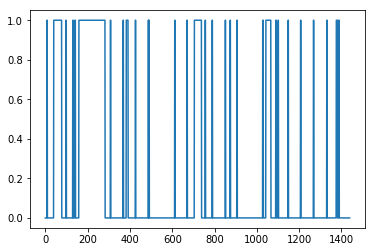

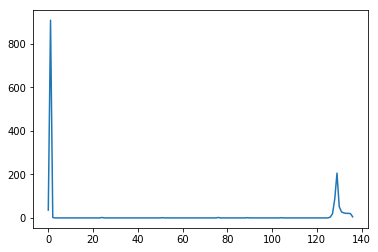

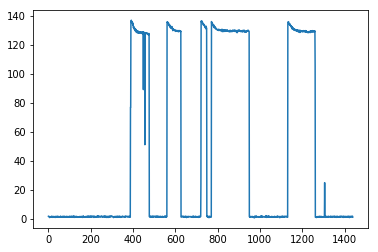

('threshold = ', 51)


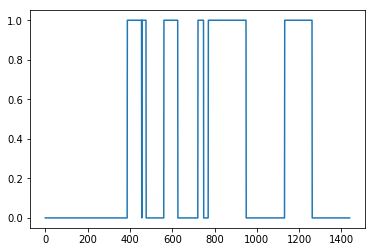

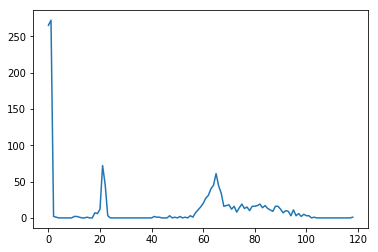

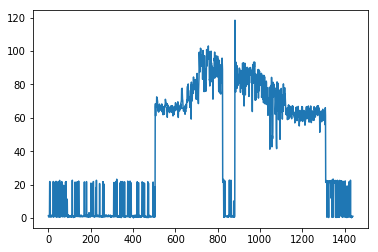

('threshold = ', 41)


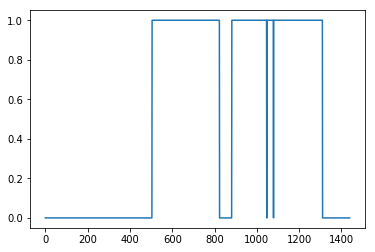

In [4]:

for houseN in range(len(allBackets)): 
    showNow = np.zeros((int(MaxMinHouse[0,houseN])+1,1))
    printSignal = []
    for i in range(len(allBackets[houseN])):
        showNow[int(allBackets[houseN][i][0])] = showNow[int(allBackets[houseN][i][0])] + 1
        printSignal.append(allBackets[houseN][i][0])

        
        
    plt.plot(showNow)
    plt.show()
    
    
    plt.plot(printSignal)
    plt.show()
    
    thresh_value = balanced_hist_thresholding(showNow)
    
    if houseN==0:
        thresh_value = 12
    print("threshold = ",thresh_value)
    
    showThreshold = []
    for i in range(len(allBackets[houseN])):
        if (int(allBackets[houseN][i][0])>thresh_value):
            allBackets[houseN][i][2] = 1 
        else:
            allBackets[houseN][i][2] = 0 
            
        showThreshold.append(allBackets[houseN][i][2])
        
    plt.plot(showThreshold)
    plt.show()
    
    


(2981.841000000001, 1.87)


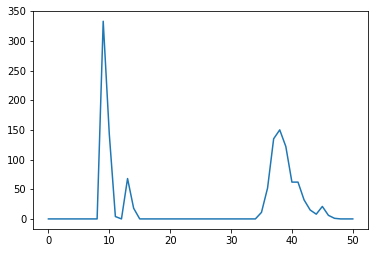

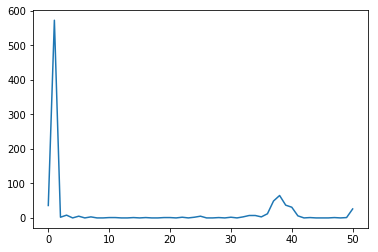

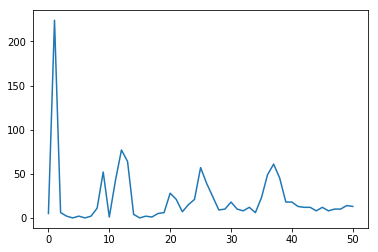

In [5]:
import numpy as np
import matplotlib.pyplot as plt


# print(dataFrame.ts[1])

maxTV = max(dataFrame.Agg)
minTV = min(dataFrame.Agg)
print(maxTV,minTV)

maxTV = 130

backetsAvailable = 50 # This is the numbers of areas that we will have 
areaPerBacket = (maxTV-minTV)/backetsAvailable

todayBackets = np.zeros((backetsAvailable+1,3))
for i in range(len(dataFrame.TV)):
    if (dataFrame.Agg[i]<130):
        backetNow = int(dataFrame.Agg[i]/areaPerBacket)
        todayBackets[backetNow,int(dataFrame.House[i])-1] = todayBackets[backetNow,int(dataFrame.House[i])-1] + 1
    

plt.plot(todayBackets[:,0])
plt.show()   
plt.plot(todayBackets[:,1])
plt.show()   
plt.plot(todayBackets[:,2])
plt.show()   




## --------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------

# TASK 2:



## Visualise available data (agg power levels)

1s in blue, 0s in orange

House  0


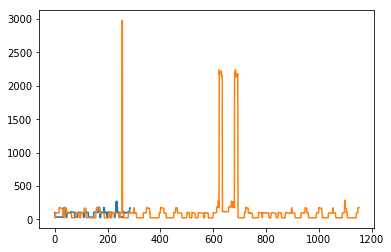

ones:  287
min 27.236000000000004 max 272.798 mean 89.19228919860626

zeros:  1153
min 23.241 max 2981.841000000001 mean 127.23335212489158
------------------------------------------

House  1


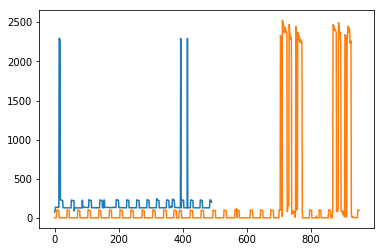

ones:  490
min 78.623 max 2293.5080000000007 mean 181.48038775510207

zeros:  950
min 1.87 max 2524.0260000000007 mean 226.02191789473684
------------------------------------------

House  2


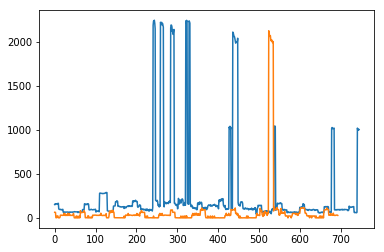

ones:  746
min 46.713 max 2242.771 mean 261.9997305630027

zeros:  694
min 2.3890000000000002 max 2123.544 mean 68.02825072046109
------------------------------------------


In [6]:
def visualise_data (allBackets):
    print "1s in blue, 0s in orange"
    for i in range(3):
        print
        print "House ",i
        ones = [v for v in allBackets[i] if v[2] == 1]
        ones = np.array(ones)
        zeros = [v for v in allBackets[i] if v[2] == 0]
        zeros = np.array(zeros)

        plt.plot(ones[:,1])
        plt.plot(zeros[:,1])
        plt.show()
        print "ones: ", len(ones)
        print "min",np.min(ones[:,1]), "max", np.max(ones[:,1]), "mean", np.mean(ones[:,1])
        print
        print "zeros: ",len(zeros)
        print "min",np.min(zeros[:,1]), "max", np.max(zeros[:,1]), "mean", np.mean(zeros[:,1])
        print "------------------------------------------"
        
visualise_data(allBackets)


## Observe characteristics (min, max, mean) in overall data and on/off specifically

House  0
min 23.241 max 2981.841000000001 mean 119.65155694444447


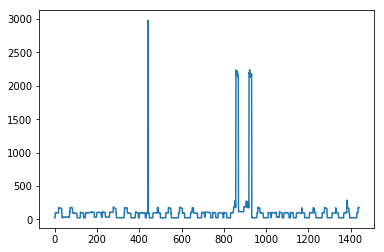

House  1
min 1.87 max 2524.0260000000007 mean 210.86542500000004


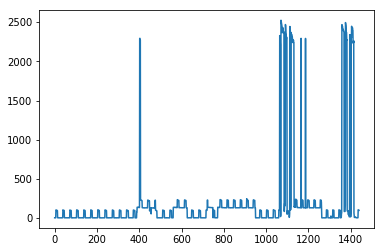

House  2
min 2.3890000000000002 max 2242.771 mean 168.5162534722222


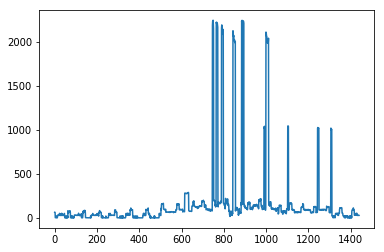

________________________ON___________________________
House  0
min 27.236000000000004 max 272.798 mean 89.19228919860626


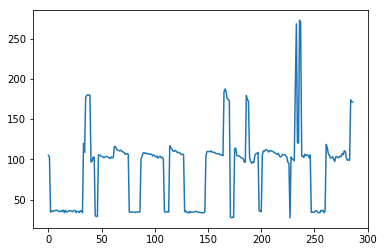

House  1
min 78.623 max 2293.5080000000007 mean 181.48038775510207


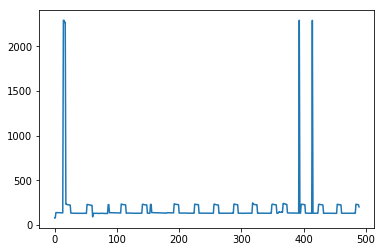

House  2
min 46.713 max 2242.771 mean 261.9997305630027


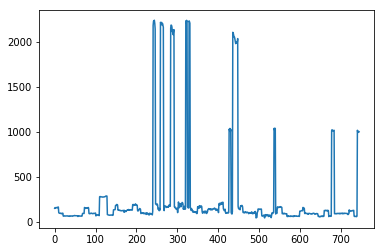

________________________OFF___________________________
House  0
min 23.241 max 2981.841000000001 mean 127.23335212489158


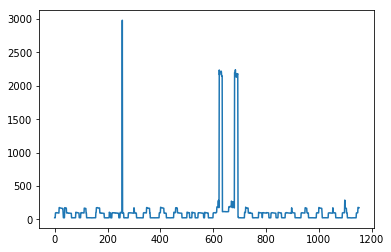

House  1
min 1.87 max 2524.0260000000007 mean 226.02191789473684


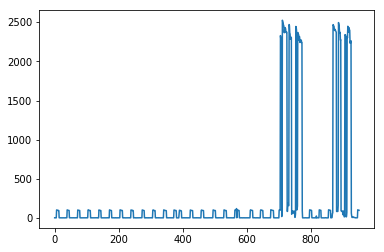

House  2
min 2.3890000000000002 max 2123.544 mean 68.02825072046109


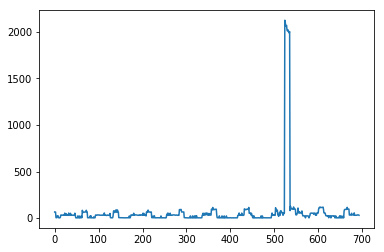

In [7]:
def min_max_all (allBackets, i):
    print "House ", i
    data = np.array(allBackets[i])

    print "min",np.min(data[:,1]), "max", np.max(data[:,1]), "mean", np.mean(data[:,1])
    plt.plot(data[:,1])
    plt.show()
    
    return np.min(data[:,1]), np.max(data[:,1]), np.mean(data[:,1])

def min_max_on (allBackets, i):
    print "House ", i
    ones = [v for v in allBackets[i] if v[2] == 1]
    data = np.array(ones)
    
    print "min",np.min(data[:,1]), "max", np.max(data[:,1]), "mean", np.mean(data[:,1])
    plt.plot(data[:,1])
    plt.show()
    
    return np.min(data[:,1]), np.max(data[:,1]), np.mean(data[:,1])

def min_max_off (allBackets, i):
    print "House ", i
    ones = [v for v in allBackets[i] if v[2] == 0]
    data = np.array(ones)
    
    print "min",np.min(data[:,1]), "max", np.max(data[:,1]), "mean", np.mean(data[:,1])
    plt.plot(data[:,1])
    plt.show()
    
    return np.min(data[:,1]), np.max(data[:,1]), np.mean(data[:,1])

min_all1, max_all1, mean_all1 = min_max_all (allBackets, 0)
min_all2, max_all2, mean_all2 = min_max_all (allBackets, 1)
min_all3, max_all3, mean_all3 = min_max_all (allBackets, 2)

print "________________________ON___________________________"
min_on1, max_on1, mean_on1 = min_max_on (allBackets, 0)
min_on2, max_on2, mean_on2 = min_max_on (allBackets, 1)
min_on3, max_on3, mean_on3 = min_max_on (allBackets, 2)


print "________________________OFF___________________________"
min_off1, max_off1, mean_off1 = min_max_off (allBackets, 0)
min_off2, max_off2, mean_off2 = min_max_off (allBackets, 1)
min_off3, max_off3, mean_off3 = min_max_off (allBackets, 2)


### At this point the data seem to have a lot of variability due to the outliers that are present in the data

# IDENTIFY OUTLIERS

In [8]:
def find_outliers(data):
    #Arrange the data in increasing order
    sorted(data)
    
    #Calculate first(q1) and third quartile(q3)
    q1, q3= np.percentile(data,[25,75])
    #print ("q1",q1, "q3",q3)
    
    #Find interquartile range (q3-q1)
    iqr = q3 - q1
    
    #Find lower bound q1*1.5
    #Find upper bound q3*1.5
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    
    print "bounds:  ",lower_bound, "<->", upper_bound

    #Anything that lies outside of lower and upper bound is an outlier    
    return lower_bound, upper_bound

### Bounds for outliers in each house:

bounds:   -38.60925 <-> 64.34875
max in house 0:  2981.841000000001


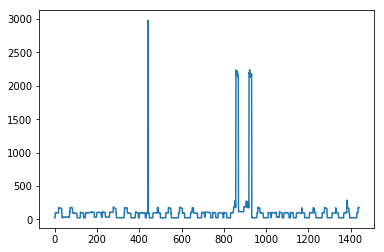

bounds:   -152.907125 <-> 257.51187500000003
max in house 1:  2524.0260000000007


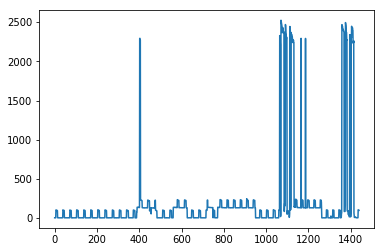

bounds:   -103.58937499999999 <-> 175.31562499999998
max in house 2:  2242.771


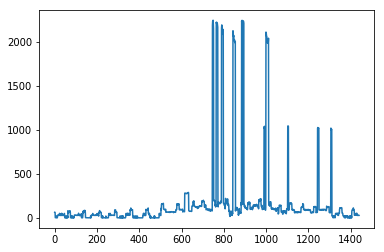

In [9]:
house0 = allBackets[0]
house1 = allBackets[1]
house2 = allBackets[2]

lower_bound1, upper_bound1 = find_outliers (house0)
print "max in house 0: ", np.array(house0).max()
plt.plot(np.array(house0)[:,1])
plt.show()

lower_bound2, upper_bound2 = find_outliers (house1)
print "max in house 1: ", np.array(house1).max()
plt.plot(np.array(house1)[:,1])
plt.show()

lower_bound3, upper_bound3 = find_outliers (house2)
print "max in house 2: ", np.array(house2).max()
plt.plot(np.array(house2)[:,1])
plt.show()



### Bounds for outliers overall:

bounds:   -38.60925 <-> 64.34875
max in house 0:  2981.841000000001


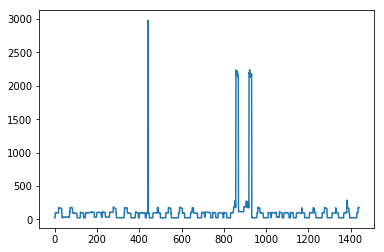

bounds:   -152.907125 <-> 257.51187500000003
max in house 1:  2524.0260000000007


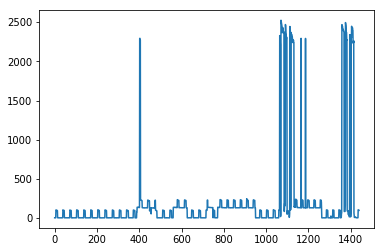

bounds:   -103.58937499999999 <-> 175.31562499999998
max in house 2:  2242.771


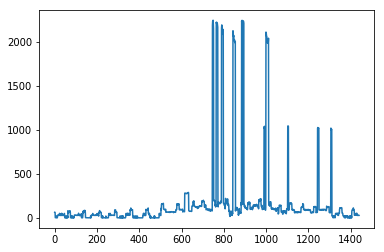

In [10]:
#house0 = allBackets[0]
#house1 = allBackets[1]
#house2 = allBackets[2]

lower_bound1, upper_bound0 = find_outliers (house0)
print "max in house 0: ", np.array(house0).max()
plt.plot(np.array(house0)[:,1])
plt.show()

lower_bound2, upper_bound1 = find_outliers (house1)
print "max in house 1: ", np.array(house1).max()
plt.plot(np.array(house1)[:,1])
plt.show()

lower_bound3, upper_bound2 = find_outliers (house2)
print "max in house 2: ", np.array(house2).max()
plt.plot(np.array(house2)[:,1])
plt.show()

In [11]:
data = []
data.extend(house0) 
data.extend(house1) 
data.extend(house2)

data = np.array(data)
data = data[:,1] 
print len(house0), len(house1), len(house2)
print len(data)

1440 1440 1440
4320


bounds:   -131.71587499999998 <-> 286.36512500000003


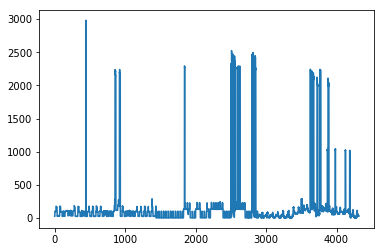

In [12]:
lower_bound, upper_bound = find_outliers (data)
#print "max in house 0: ", np.array(house0).max()
plt.plot(data)
plt.show()

# UNDERSAMPLING (REMOVE OUTLIERS FROM DATA) & VISUALISATION

In [13]:
def undersampling (allBackets):

    underSampl1 = [v for v in allBackets[0] if v[1] < upper_bound]
    underSampl2 = [v for v in allBackets[1] if v[1] < upper_bound]
    underSampl3 = [v for v in allBackets[2] if v[1] < upper_bound]

    return underSampl1,underSampl2,underSampl3


underSampl1,underSampl2,underSampl3 = undersampling(allBackets)

allBackets2=[]
allBackets2.append(underSampl1)
print (len(allBackets2[0]))
allBackets2.append(underSampl2)
print (len(allBackets2[1]))
allBackets2.append(underSampl3)
print (len(allBackets2[2]))

print (allBackets2[0][0])


1413
1354
1360
[11.463, 26.205, 0]


1s in blue, 0s in orange

House  0


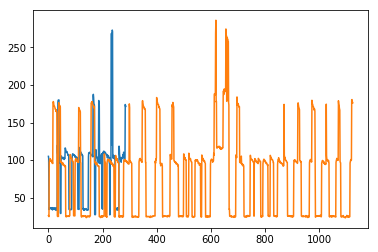

ones:  287
min 27.236000000000004 max 272.798 mean 89.19228919860626

zeros:  1126
min 23.241 max 285.85 mean 78.91724689165187
------------------------------------------

House  1


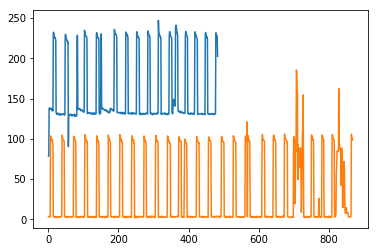

ones:  484
min 78.623 max 247.1 mean 155.40420454545455

zeros:  870
min 1.87 max 185.418 mean 29.608228735632185
------------------------------------------

House  2


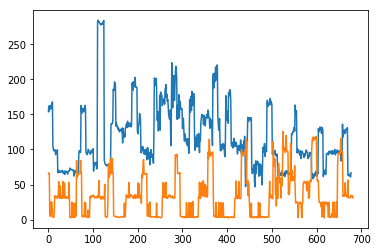

ones:  678
min 46.713 max 284.34 mean 118.96719616519172

zeros:  682
min 2.3890000000000002 max 125.61399999999999 mean 33.35397360703813
------------------------------------------


In [14]:
visualise_data(allBackets2)

House  0
min 23.241 max 285.85 mean 81.00425123849965


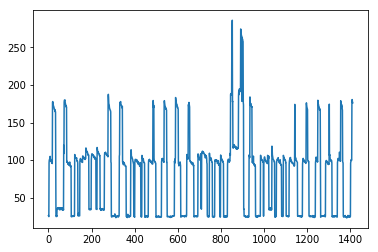

House  1
min 1.87 max 247.1 mean 74.57518020679468


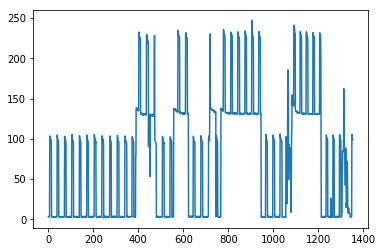

House  2
min 2.3890000000000002 max 284.34 mean 76.03468308823528


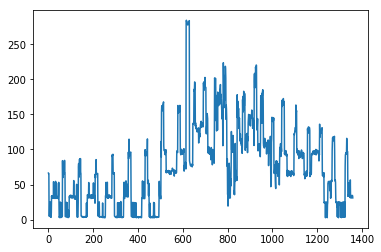

________________________ON___________________________
House  0
min 27.236000000000004 max 272.798 mean 89.19228919860626


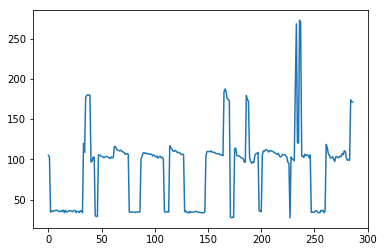

House  1
min 78.623 max 247.1 mean 155.40420454545455


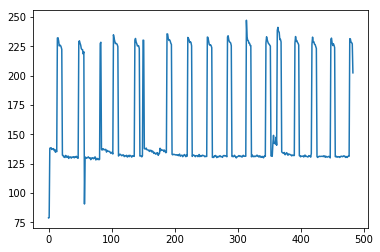

House  2
min 46.713 max 284.34 mean 118.96719616519172


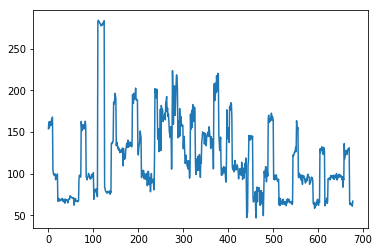

________________________OFF___________________________
House  0
min 23.241 max 285.85 mean 78.91724689165187


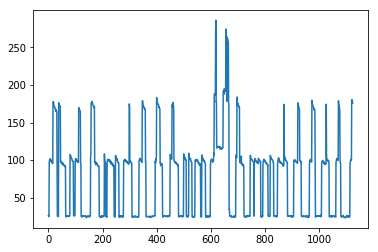

House  1
min 1.87 max 185.418 mean 29.608228735632185


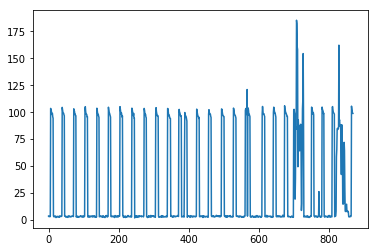

House  2
min 2.3890000000000002 max 125.61399999999999 mean 33.35397360703813


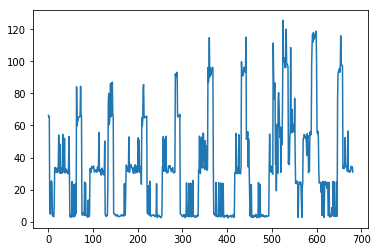

In [15]:
min_all1, max_all1, mean_all1 = min_max_all (allBackets2, 0)
min_all2, max_all2, mean_all2 = min_max_all (allBackets2, 1)
min_all3, max_all3, mean_all3 = min_max_all (allBackets2, 2)

print "________________________ON___________________________"
min_on1, max_on1, mean_on1 = min_max_on (allBackets2, 0)
min_on2, max_on2, mean_on2 = min_max_on (allBackets2, 1)
min_on3, max_on3, mean_on3 = min_max_on (allBackets2, 2)


print "________________________OFF___________________________"
min_off1, max_off1, mean_off1 = min_max_off (allBackets2, 0)
min_off2, max_off2, mean_off2 = min_max_off (allBackets2, 1)
min_off3, max_off3, mean_off3 = min_max_off (allBackets2, 2)

# TRAIN & TEST SETS

##### we are gonna divide our data with 30-70 ratio
##### the outliers will be removed from the training set 
##### in the test set there will be the original data

In [16]:
#ALL HOUSES ORIGINAL
import random
import math



def train_test_sets(allBackets, trainRatio, House0, Outliers_train, Outliers_test):

    totalInfoLen = len(allBackets[0]) #1440
    trainDataRange = int(math.floor(totalInfoLen * trainRatio))

    if House0 == 1:
        #seperate data for each house in order to get balanced data for each house
        house0 = allBackets[0]
        house1 = allBackets[1]
        house2 = allBackets[2]

        #shufling data
        random.shuffle(house0)
        random.shuffle(house1)
        random.shuffle(house2)

        #training set
        training_set = house0[:trainDataRange]
        training_set.extend(house1[:trainDataRange])
        training_set.extend(house2[:trainDataRange])
        random.shuffle(training_set)

        #test set
        test_set = house0[trainDataRange:]
        test_set.extend(house1[trainDataRange:])
        test_set.extend(house2[trainDataRange:])
        random.shuffle(test_set)

    else:
        #seperate data for each house in order to get balanced data for each house
        house1 = allBackets[1]
        house2 = allBackets[2]

        #shufling data
        random.shuffle(house1)
        random.shuffle(house2)

        #training set
        training_set = house1[:trainDataRange]
        training_set.extend(house2[:trainDataRange])
        random.shuffle(training_set)

        #test set
        test_set = house1[trainDataRange:]
        test_set.extend(house2[trainDataRange:])
        random.shuffle(test_set)

    if Outliers_train == 0:
        training = np.array(training_set)
        training = [v for v in training if v[1] < 282]
        training = np.array(training)
    else:
        training = np.array(training_set)

    if Outliers_test == 0:
        testing = np.array(test_set)
        testing = [v for v in testing if v[1] < 282]
        testing = np.array(testing)
    else:
        testing = np.array(test_set)



    TRAIN = [0,0]
    TRAIN[0] = training[:,1] #agg data
    TRAIN[1] = training[:,2] #on-off labels

    TEST = [0,0]
    TEST[0] = testing[:,1]
    TEST[1] = testing[:,2]

    #train_data, train_labels, test_data, test_labels
    return TRAIN[0], TRAIN[1], TEST[0], TEST[1]


In [17]:

#ALL HOUSES ORIGINAL
train_data_org , train_labels_org, test_data_org , test_labels_org = train_test_sets(allBackets, 0.7, House0=1, Outliers_train=1, Outliers_test=1)
#ALL HOUSES :TRAIN_DATA -> NO OUTLIERS
train_data , train_labels,test_data , test_labels = train_test_sets(allBackets, 0.7, House0=1, Outliers_train=0, Outliers_test=1)
#ALL HOUSES : TRAIN_DATA & TEST DATA -> NO OUTLIERS"
train_data_noOUT , train_labels_noOUT , test_data_noOUT  , test_labels_noOUT = train_test_sets(allBackets, 0.7, House0=1, Outliers_train=0, Outliers_test=0)


#ORIGINAL NO HOUSE 0
train_data_noHouse0_org , train_labels_noHouse0_org, test_data_noHouse0_org  , test_labels_noHouse0_org = train_test_sets(allBackets, 0.7, House0=0, Outliers_train=1, Outliers_test=1)
#NO HOUSE 0 : TRAIN_DATA -> NO OUTLIERS
train_data_noHouse0 , train_labels_noHouse0 ,test_data_noHouse0  , test_labels_noHouse0= train_test_sets(allBackets, 0.7, House0=0, Outliers_train=0, Outliers_test=1)
#"NO HOUSE 0 : TRAIN_DATA & TEST DATA -> NO OUTLIERS"
train_data_noHouse0_noOUT , train_labels_noHouse0_noOUT , test_data_noHouse0_noOUT  , test_labels_noHouse0_noOUT = train_test_sets(allBackets, 0.7, House0=0, Outliers_train=0, Outliers_test=0)




In [18]:
#ALL HOUSES but train data undersampled
# LOGISTIC REGRESSION CLASSIFIER

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as all_score


def logisticRegression_classifier(train_data, train_labels, test_data, test_labels):

    logisticRegr = LogisticRegression()
    
    train_data = train_data.reshape(-1,1)
    logisticRegr.fit(train_data, train_labels)

    test_data = test_data.reshape(-1,1)
    predictions = logisticRegr.predict(test_data)

    print accuracy_score(test_labels, predictions)
    print confusion_matrix(test_labels, predictions) 

    target_names = ['0', '1']
    print(classification_report(test_labels, predictions,target_names=target_names))
    

In [19]:
#FUNCTION
print "ALL HOUSES ORIGINAL"
logisticRegression_classifier(train_data_org, train_labels_org, test_data_org, test_labels_org)
print "ALL HOUSES : TRAIN_DATA -> NO OUTLIERS"
logisticRegression_classifier(train_data, train_labels, test_data, test_labels)
print "ALL HOUSES : TRAIN_DATA & TEST DATA -> NO OUTLIERS"
logisticRegression_classifier(train_data_noOUT , train_labels_noOUT , test_data_noOUT , test_labels_noOUT )

print "NO HOUSE 0 -  ORIGINAL"
logisticRegression_classifier(train_data_noHouse0_org , train_labels_noHouse0_org , test_data_noHouse0_org , test_labels_noHouse0_org)
print "NO HOUSE 0 : TRAIN_DATA -> NO OUTLIERS"
logisticRegression_classifier(train_data_noHouse0 , train_labels_noHouse0 , test_data_noHouse0 , test_labels_noHouse0 )
print "NO HOUSE 0 : TRAIN_DATA & TEST DATA -> NO OUTLIERS"
logisticRegression_classifier(train_data_noHouse0_noOUT , train_labels_noHouse0_noOUT , test_data_noHouse0_noOUT , test_labels_noHouse0_noOUT )


ALL HOUSES ORIGINAL
0.6466512702078522
[[840   4]
 [455   0]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       844
           1       0.00      0.00      0.00       455

   micro avg       0.65      0.65      0.65      1299
   macro avg       0.32      0.50      0.39      1299
weighted avg       0.42      0.65      0.51      1299

ALL HOUSES : TRAIN_DATA -> NO OUTLIERS
0.7998460354118553
[[769  90]
 [170 270]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       859
           1       0.75      0.61      0.67       440

   micro avg       0.80      0.80      0.80      1299
   macro avg       0.78      0.75      0.77      1299
weighted avg       0.80      0.80      0.79      1299

ALL HOUSES : TRAIN_DATA & TEST DATA -> NO OUTLIERS
0.7975708502024291
[[750  52]
 [198 235]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       802
 

/mnt/storage/home/qb18517/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## SVM

In [20]:
from sklearn import svm
def svm_classifier(train_data, train_labels, test_data, test_labels):

    clf = svm.SVC() # Linear Kernel
    #Train the model using the training sets
    train_data = train_data.reshape(-1,1)
    clf.fit(train_data, train_labels)

    #Predict the response for test dataset
    test_data = test_data.reshape(-1,1)
    predictions = clf.predict(test_data)

    print accuracy_score(test_labels, predictions)
    print confusion_matrix(test_labels, predictions) 

    target_names = ['0', '1']
    print(classification_report(test_labels, predictions,target_names=target_names))
        



In [21]:
print "ALL HOUSES ORIGINAL"
svm_classifier(train_data_org, train_labels_org, test_data_org, test_labels_org)
print "ALL HOUSES : TRAIN_DATA -> NO OUTLIERS"
svm_classifier(train_data, train_labels, test_data, test_labels)
print "ALL HOUSES : TRAIN_DATA & TEST DATA -> NO OUTLIERS"
svm_classifier(train_data_noOUT , train_labels_noOUT , test_data_noOUT , test_labels_noOUT )

print "NO HOUSE 0 -  ORIGINAL"
svm_classifier(train_data_noHouse0_org , train_labels_noHouse0_org , test_data_noHouse0_org , test_labels_noHouse0_org)
print "NO HOUSE 0 : TRAIN_DATA -> NO OUTLIERS"
svm_classifier(train_data_noHouse0 , train_labels_noHouse0 , test_data_noHouse0 , test_labels_noHouse0 )
print "NO HOUSE 0 : TRAIN_DATA & TEST DATA -> NO OUTLIERS"
svm_classifier(train_data_noHouse0_noOUT , train_labels_noHouse0_noOUT , test_data_noHouse0_noOUT , test_labels_noHouse0_noOUT )


ALL HOUSES ORIGINAL


/mnt/storage/home/qb18517/.local/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8737490377213241
[[787  57]
 [107 348]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       844
           1       0.86      0.76      0.81       455

   micro avg       0.87      0.87      0.87      1299
   macro avg       0.87      0.85      0.86      1299
weighted avg       0.87      0.87      0.87      1299

ALL HOUSES : TRAIN_DATA -> NO OUTLIERS
0.8483448806774442
[[755 104]
 [ 93 347]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       859
           1       0.77      0.79      0.78       440

   micro avg       0.85      0.85      0.85      1299
   macro avg       0.83      0.83      0.83      1299
weighted avg       0.85      0.85      0.85      1299

ALL HOUSES : TRAIN_DATA & TEST DATA -> NO OUTLIERS
0.8647773279352227
[[744  58]
 [109 324]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       802
           1       0.

## FURTHER RESEARCH

remove outliers from off data and remove outliers from on data 